In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [13]:
file_path = 'crime_dataset_india.csv'
crime_data = pd.read_csv(file_path)

In [14]:
crime_data['Date Reported'] = pd.to_datetime(crime_data['Date Reported'], format='%d-%m-%Y %H:%M')
city_data = crime_data[crime_data['City'] == 'Hyderabad']
city_data_daily = city_data.groupby(city_data['Date Reported'].dt.date).size()

In [15]:

time_series = pd.Series(city_data_daily, index=pd.to_datetime(city_data_daily.index))

In [16]:
def hull_moving_average(series, period):
    half_period = period // 2
    sqrt_period = int(np.sqrt(period))
    weighted_ma = 2 * series.rolling(window=half_period).mean() - series.rolling(window=period).mean()
    return weighted_ma.rolling(window=sqrt_period).mean()

In [17]:
window_size = 7

In [18]:
simple_ma = time_series.rolling(window=window_size).mean()
exponential_ma = time_series.ewm(span=window_size).mean()
weighted_ma = time_series.rolling(window=window_size).apply(
    lambda x: np.dot(x, np.arange(1, window_size + 1)) / np.sum(np.arange(1, window_size + 1)), raw=True
)
hull_ma = hull_moving_average(time_series, window_size)

In [19]:
short_term_ma = time_series.rolling(window=5).mean()
long_term_ma = time_series.rolling(window=20).mean()

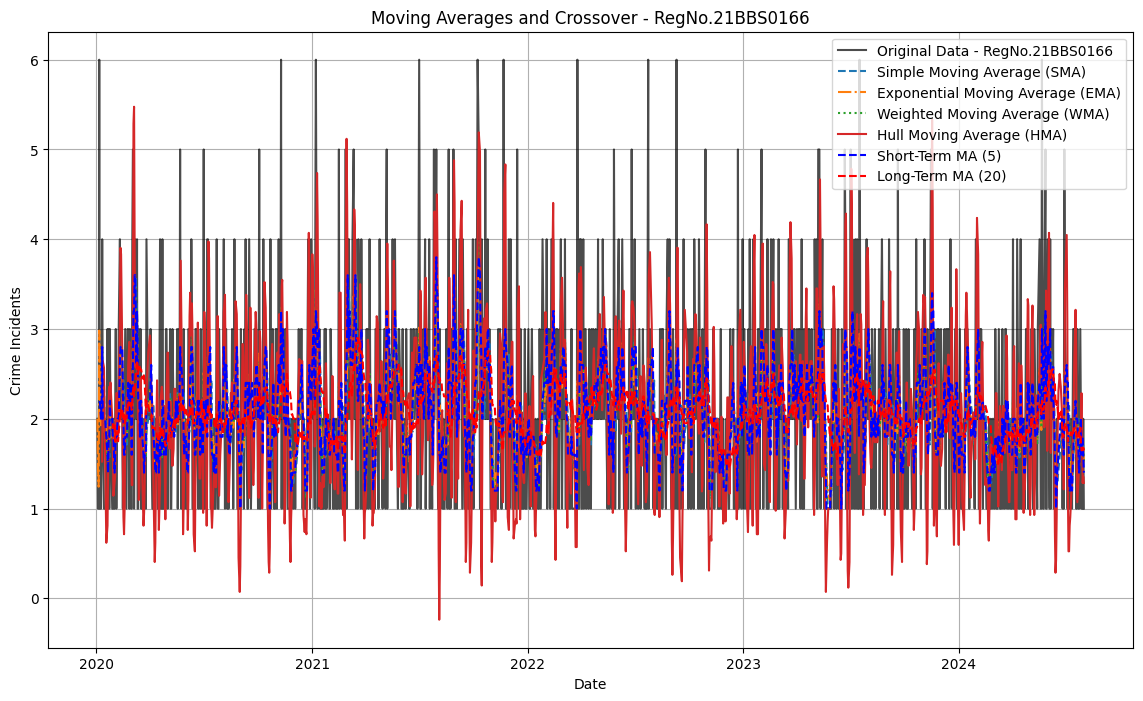

In [23]:
plt.figure(figsize=(14, 8))
plt.plot(time_series, label="Original Data - RegNo.21BBS0166", color='black', alpha=0.7)
plt.plot(simple_ma, label="Simple Moving Average (SMA)", linestyle='--')
plt.plot(exponential_ma, label="Exponential Moving Average (EMA)", linestyle='-.')
plt.plot(weighted_ma, label="Weighted Moving Average (WMA)", linestyle=':')
plt.plot(hull_ma, label="Hull Moving Average (HMA)", linestyle='-')
plt.plot(short_term_ma, label="Short-Term MA (5)", linestyle='--', color='blue')
plt.plot(long_term_ma, label="Long-Term MA (20)", linestyle='--', color='red')
plt.title("Moving Averages and Crossover - RegNo.21BBS0166")
plt.xlabel("Date")
plt.ylabel("Crime Incidents")
plt.legend()
plt.grid(True)
plt.show()

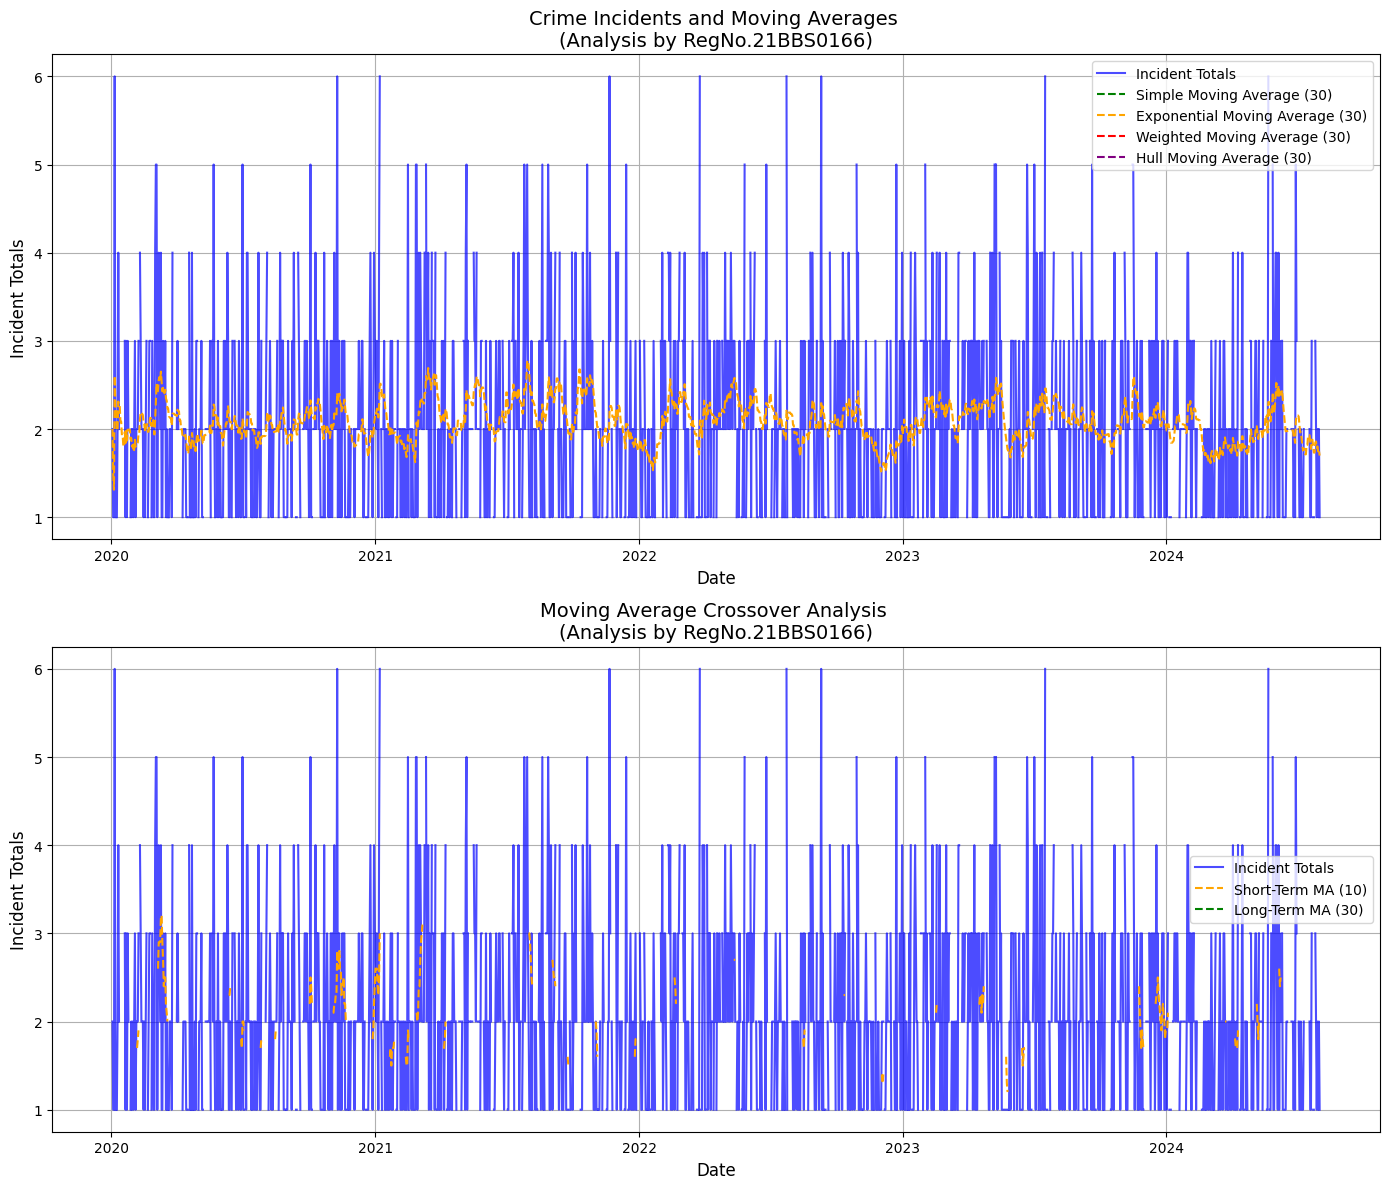

In [26]:
# Parameters for Moving Averages
window_size = 30  # For simple, exponential, weighted, and hull moving averages

# Calculate Moving Averages
simple_ma = time_series.rolling(window=window_size).mean()
exponential_ma = time_series.ewm(span=window_size).mean()
weighted_ma = time_series.rolling(window=window_size).apply(
    lambda x: np.dot(x, np.arange(1, window_size + 1)) / np.sum(np.arange(1, window_size + 1)), raw=True
)
hull_ma = hull_moving_average(time_series, window_size)

# Parameters for Crossover Analysis
short_term_ma_crossover = time_series.rolling(window=10).mean()
long_term_ma_crossover = time_series.rolling(window=30).mean()

# Create subplot for both analyses
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# First Plot: Moving Averages
axes[0].plot(time_series, label="Incident Totals", color='blue', alpha=0.7)
axes[0].plot(simple_ma, label="Simple Moving Average (30)", linestyle='--', color='green')
axes[0].plot(exponential_ma, label="Exponential Moving Average (30)", linestyle='--', color='orange')
axes[0].plot(weighted_ma, label="Weighted Moving Average (30)", linestyle='--', color='red')
axes[0].plot(hull_ma, label="Hull Moving Average (30)", linestyle='--', color='purple')
axes[0].set_title("Crime Incidents and Moving Averages \n(Analysis by RegNo.21BBS0166)", fontsize=14)
axes[0].set_xlabel("Date", fontsize=12)
axes[0].set_ylabel("Incident Totals", fontsize=12)
axes[0].legend()
axes[0].grid(True)

# Second Plot: Moving Average Crossover
axes[1].plot(time_series, label="Incident Totals", color='blue', alpha=0.7)
axes[1].plot(short_term_ma_crossover, label="Short-Term MA (10)", linestyle='--', color='orange')
axes[1].plot(long_term_ma_crossover, label="Long-Term MA (30)", linestyle='--', color='green')
axes[1].set_title("Moving Average Crossover Analysis \n(Analysis by RegNo.21BBS0166)", fontsize=14)
axes[1].set_xlabel("Date", fontsize=12)
axes[1].set_ylabel("Incident Totals", fontsize=12)
axes[1].legend()
axes[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()
